In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# 초기 계수
v0 = 20.0       # 초기 속도 (m/s)
angle = 45.0    # 발사 각도 (도)
g = 9.81        # 중력 가속도 (m/s^2)
k = 0.3         # 공기 저항 계수

# 초기 속도 벡터
# Angle 입력시 degree -> radian 변환 
vx0 = v0 * np.cos(np.radians(angle))
vy0 = v0 * np.sin(np.radians(angle))

# 시간 설정
t0 = 0      # Time (First)
tf = 5      # Time (final)
dt = 0.001   # Delta Time
t = np.arange(t0, tf, dt)
# t = [0, dt*1, dt*2 ... (tf - dt)]
# t0부터 tf까지 dt간격의 스텝을 리스트화

print(t)

# 궤적 계산을 위한 배열 초기화
x = np.zeros(len(t))
y = np.zeros(len(t))
vx = np.zeros(len(t))
vy = np.zeros(len(t))

[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]


In [4]:
# 초기 조건 설정
x[0], y[0] = 0, 0
vx[0], vy[0] = vx0, vy0

In [5]:
for i in range(1, len(t)):
    # 속도의 변화
    dvx = -(k * vx[i-1]) * dt 
    dvy = -(g + k * vy[i-1]) * dt 

    # 속도 업데이트
    vx[i] = vx[i-1] + dvx
    vy[i] = vy[i-1] + dvy 

    # 위치 업데이트
    x[i] = x[i-1] + vx[i-1] * dt
    y[i] = y[i-1] + vy[i-1] * dt 

    print(f"dvx: {dvx}, dvy: {dvy}, vx[{i}]: {vx[i]}, vy[{i}]: {vy[i]}, x[{i}]: {x[i]}, y[{i}]: {y[i]}")

    # 지면에 닿으면 반복 중단
    if y[i] < 0:
        print("Finish: ", dt * i)
        break 

dvx: -0.004242640687119285, dvy: -0.014052640687119287, vx[1]: 14.137892983043832, vy[1]: 14.12808298304383, x[1]: 0.01414213562373095, y[1]: 0.014142135623730949
dvx: -0.004241367894913149, dvy: -0.01404842489491315, vx[2]: 14.133651615148919, vy[2]: 14.114034558148917, x[2]: 0.028280028606774782, y[2]: 0.02827021860677478
dvx: -0.004240095484544675, dvy: -0.014044210367444675, vx[3]: 14.129411519664375, vy[3]: 14.099990347781473, x[3]: 0.0424136802219237, y[3]: 0.042384253164923696
dvx: -0.004238823455899312, dvy: -0.014039997104334442, vx[4]: 14.125172696208475, vy[4]: 14.08595035067714, x[4]: 0.05654309174158807, y[4]: 0.05648424351270517
dvx: -0.004237551808862542, dvy: -0.014035785105203143, vx[5]: 14.120935144399612, vy[5]: 14.071914565571936, x[5]: 0.07066826443779654, y[5]: 0.07057019386338231
dvx: -0.004236280543319883, dvy: -0.014031574369671581, vx[6]: 14.116698863856291, vy[6]: 14.057882991202264, x[6]: 0.08478919958219616, y[6]: 0.08464210842895425
dvx: -0.004235009659156

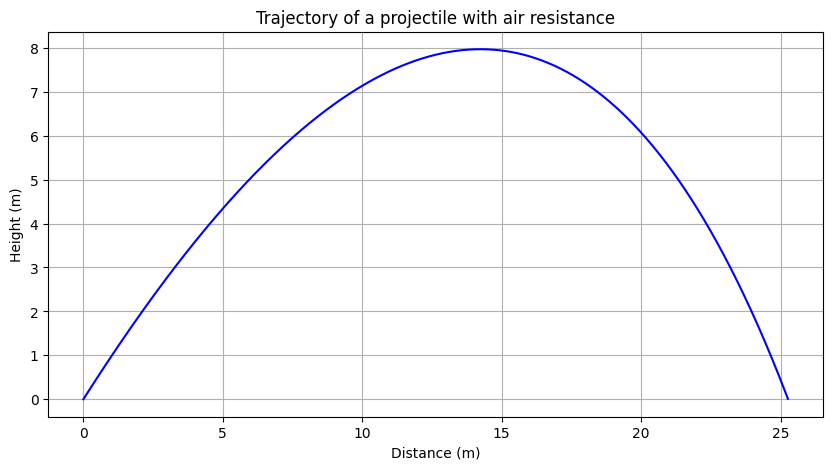

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(x[:i], y[:i], 'b-')        # Blue Solid 
plt.title('Trajectory of a projectile with air resistance')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()